<a href="https://colab.research.google.com/github/aimenSaf/PredictingStockPrices/blob/main/predictingStockPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setting the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set()  #setting seaborn as default
import math
import warnings
warnings.filterwarnings('ignore')

Reading the data

In [3]:
#Reading the input data
df = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


Understanding the data

In [ ]:
df.info()

Describing the data

In [ ]:
df.describe(include='all')

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
unique,2035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,NaN,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,NaN,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,NaN,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,NaN,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,NaN,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000


Checking for Null values

In [ ]:
#Checking for Null Values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


In [ ]:
#Checking if there are no categorical and dummy values present
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


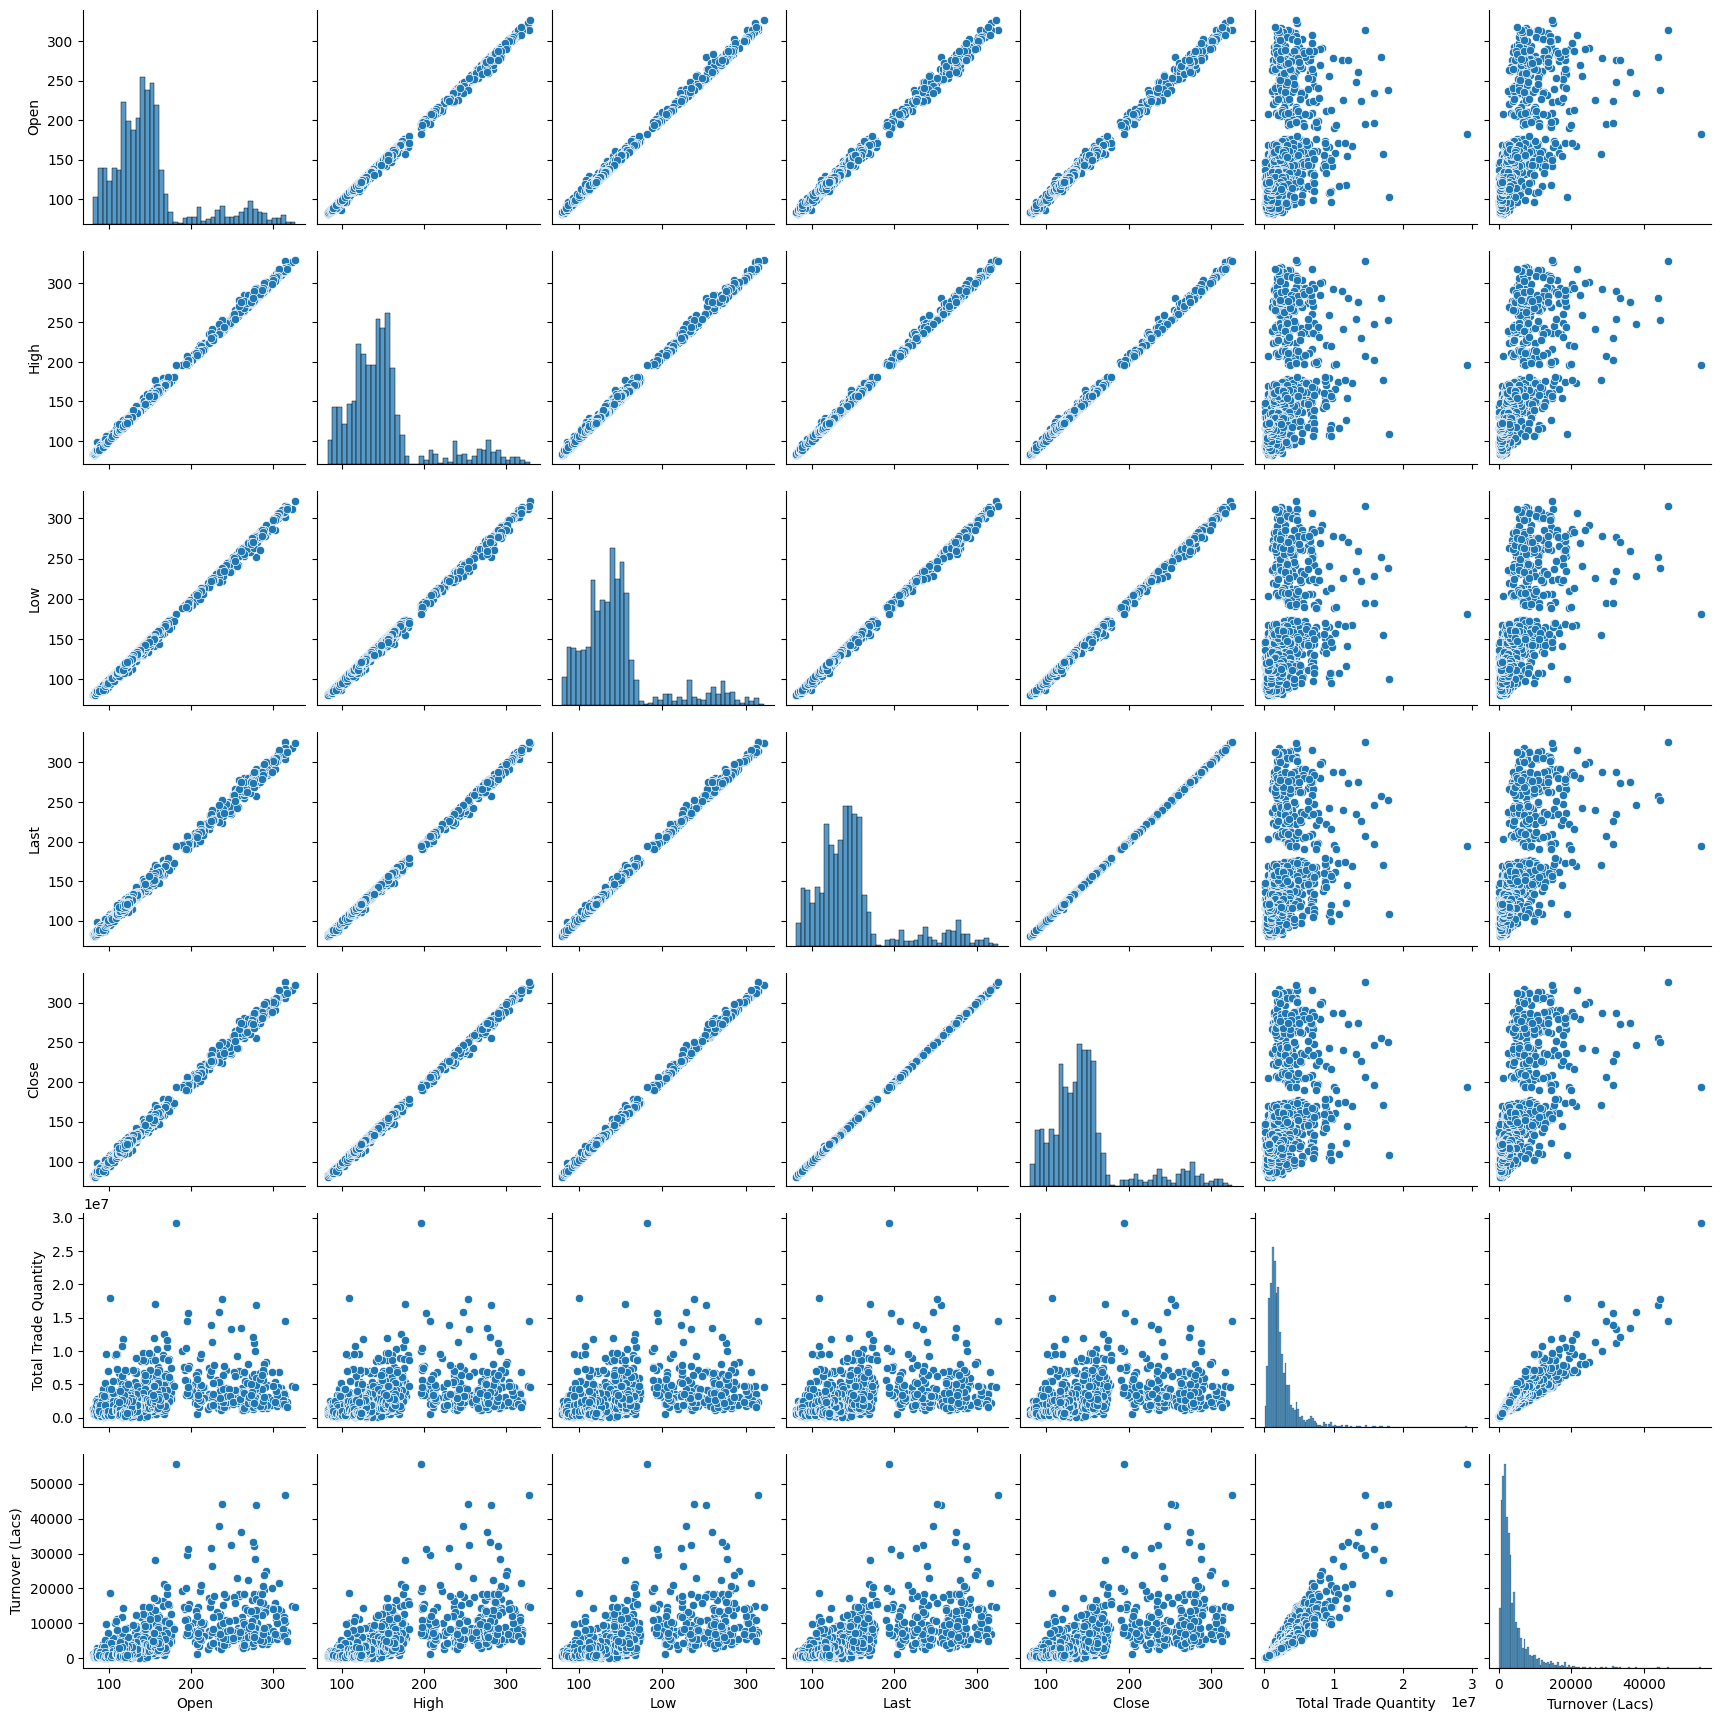

In [ ]:
sns.pairplot(df)
plt.show()

In [4]:
#Splitting data into Training and Testing data
x = df[['High', 'Low', 'Last', 'Open', 'Total Trade Quantity', 'Turnover (Lacs)']].values
y = df[['Close']].values

In [ ]:
x

use last and close as the paraemters

In [15]:
#splitting the data into test and training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [16]:
print('x:',X_train.shape)
print('y:',Y_train.shape)

x: (1628, 6)
y: (1628, 1)


In [17]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [18]:
lm.coef_


array([[ 1.01169848e-01,  1.03111894e-01,  8.68908948e-01,
        -7.28108685e-02,  1.65156538e-08, -1.83864295e-05]])

In [20]:
predictions = lm.predict(X_test)


In [22]:
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.9999374878212522

In [24]:
dframe=pd.DataFrame({'actual':Y_test.flatten(),'Predicted':predictions.flatten()})


In [25]:
dframe

,actual,Predicted
0,134.95,135.911017
1,145.35,145.826725
2,157.10,157.268006
3,152.15,152.025461
4,112.05,112.130204
...,...,...
402,118.85,118.555412
403,146.75,146.709481
404,162.45,162.646447
405,155.55,155.105938


Text(0, 0.5, 'Closing price')

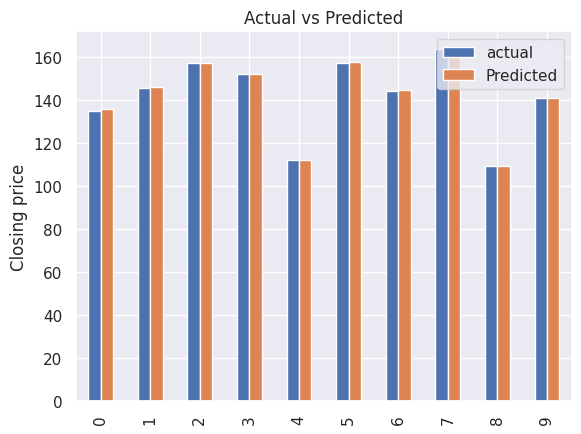

In [26]:
graph =dframe.head(10)
graph.plot(kind='bar')
plt.title('Actual vs Predicted')
plt.ylabel('Closing price')


In [27]:
import math
from sklearn import metrics

In [29]:
#metrics to find accuracy of continous variables
print('Mean Abs value:' ,metrics.mean_absolute_error(Y_test,predictions))
print('Mean squared value:',metrics.mean_squared_error(Y_test,predictions))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(Y_test,predictions)))

Mean Abs value: 0.2773168169894746
Mean squared value: 0.15226644841085718
root mean squared error value: 0.390213337048924
